## Observations and Insights 

In [231]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df= pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [232]:
# Checking the number of mice.
number_of_mice = combined_df["Mouse ID"].nunique()
number_of_mice

249

In [233]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_timepoint_df = study_results[study_results.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
mouse_timepoint_df[["Mouse ID","Timepoint"]]


,Mouse ID,Timepoint
107,g989,0
137,g989,0
329,g989,5
360,g989,5
620,g989,10
681,g989,10
815,g989,15
869,g989,15
950,g989,20
1111,g989,20


In [234]:
# Optional: Get all the data for the duplicate mouse ID. 

all_the_dublicate_mouse=pd.merge(mouse_timepoint_df,mouse_metadata,on="Mouse ID")

all_the_dublicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,g989,0,45.000000,0,Propriva,Female,21,26
1,g989,0,45.000000,0,Propriva,Female,21,26
2,g989,5,48.786801,0,Propriva,Female,21,26
3,g989,5,47.570392,0,Propriva,Female,21,26
4,g989,10,51.745156,0,Propriva,Female,21,26
5,g989,10,49.880528,0,Propriva,Female,21,26
6,g989,15,51.325852,1,Propriva,Female,21,26
7,g989,15,53.442020,0,Propriva,Female,21,26
8,g989,20,55.326122,1,Propriva,Female,21,26
9,g989,20,54.657650,1,Propriva,Female,21,26


In [235]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# unique_duplicated_mouseids =mouse_timepoint_df["Mouse ID"].unique().tolist()
unique_duplicated_mouseids=mouse_timepoint_df["Mouse ID"].unique().tolist()
filtered = combined_df["Mouse ID"].isin(unique_duplicated_mouseids)
get_index =combined_df[filtered].index
clean_df=combined_df.drop(get_index).reset_index().drop(["index"],axis=1)
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [236]:
# Checking the number of mice in the clean DataFrame.
clean_number_of_mice = clean_df["Mouse ID"].nunique()
clean_number_of_mice

248

## Summary Statistics

In [237]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_group= clean_df.groupby("Drug Regimen")
tumor_mean=regimen_group["Tumor Volume (mm3)"].mean()
tumor_median = regimen_group["Tumor Volume (mm3)"].median()
tumor_variance =regimen_group["Tumor Volume (mm3)"].var()
tumor_sd= regimen_group["Tumor Volume (mm3)"].std()
tumor_sem= regimen_group["Tumor Volume (mm3)"].sem()



In [238]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_df= pd.DataFrame({"Tumor volume mean":tumor_mean,
"Tumor volume median":tumor_median,
"Tumor volume variance":tumor_variance,
"Tumor volume STD":tumor_sd,
"Tumor volume SEM":tumor_sem})
summary_statistics_df.head()

# Using the aggregation method, produce the same summary statistics in a single line
sammary_single_line=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(Tumor_volume_mean='mean', Tumor_volume_median='median',Tumor_volume_variance='var',Tumor_volume_STD='std',Tumor_volume_SEM='sem')
sammary_single_line.head(12)


,Tumor_volume_mean,Tumor_volume_median,Tumor_volume_variance,Tumor_volume_STD,Tumor_volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

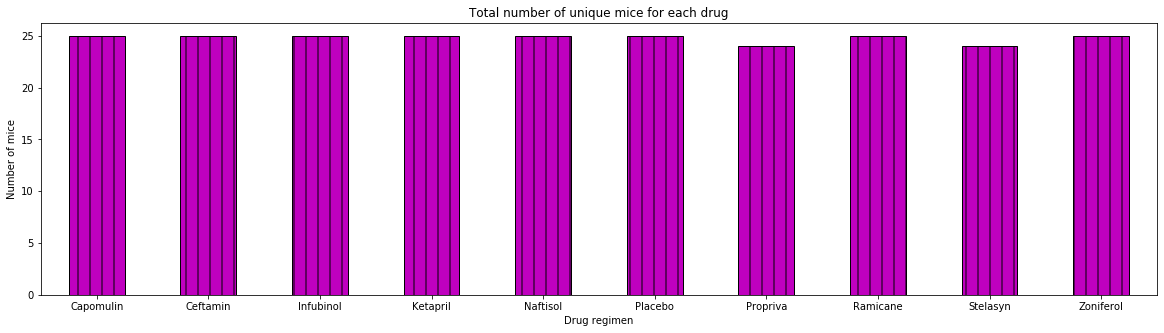

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

<Figure size 432x288 with 0 Axes>

In [252]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mouse_id = regimen_group["Mouse ID"].nunique()
drug_chart = mouse_id.plot(kind="bar", title="Total number of unique mice for each drug",color="m",edgecolor="k",hatch='|',figsize=(20,5),rot=0)
drug_chart.set_xlabel("Drug regimen")
drug_chart.set_ylabel("Number of mice")

plt.show()
plt.tight_layout()
mouse_id

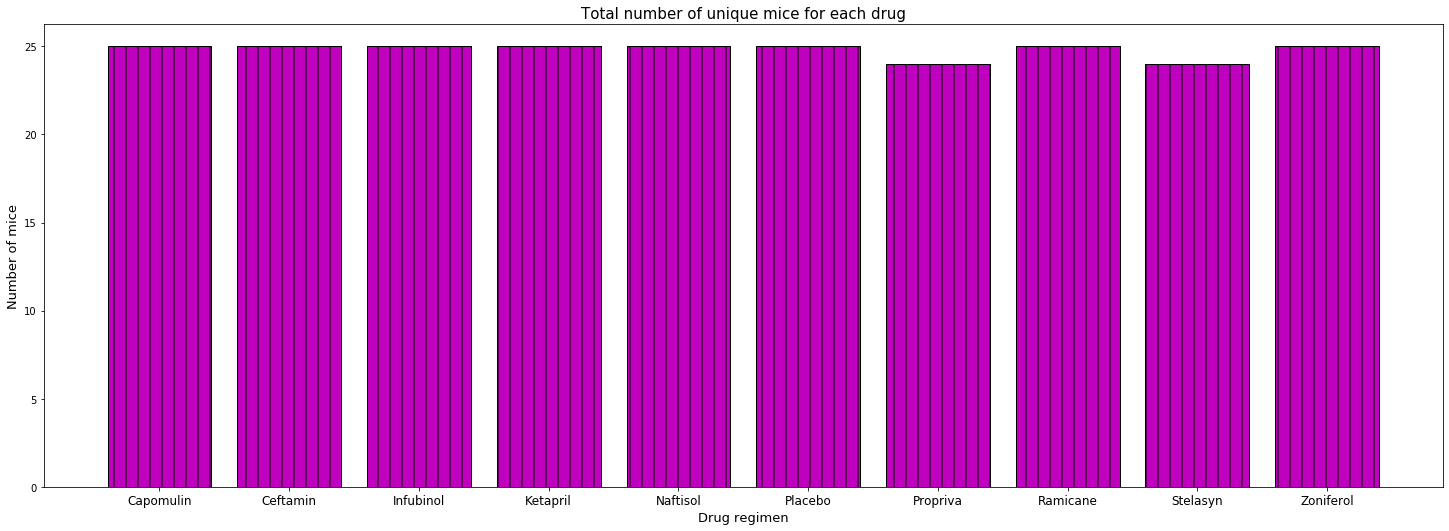

In [240]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_names=regimen_group["Drug Regimen"].unique()
label = drug_names.keys()
plt.figure(figsize=(20,7))
x_axis = np.arange(len(regimen_group))
tick_locations = [value for value in x_axis]
plt.bar(x_axis,mouse_id, color='m', edgecolor="k",hatch='|')
plt.xticks(tick_locations,label, rotation="horizontal",fontsize=12)
plt.tight_layout()
plt.title("Total number of unique mice for each drug",fontsize=15)
plt.xlabel("Drug regimen",fontsize=13)
plt.ylabel("Number of mice",fontsize=13)
plt.show()


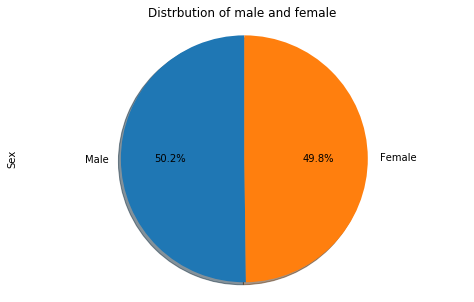

Male      125
Female    124
Name: Sex, dtype: int64

In [241]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_of_mice=mouse_metadata["Sex"].value_counts()
micesex_pie = sex_of_mice.plot(kind="pie", title=("Distrbution of male and female in the study "),autopct='%1.1f%%',shadow = True, startangle=90,figsize=(8,5))

plt.axis("equal")
plt.show()
sex_of_mice

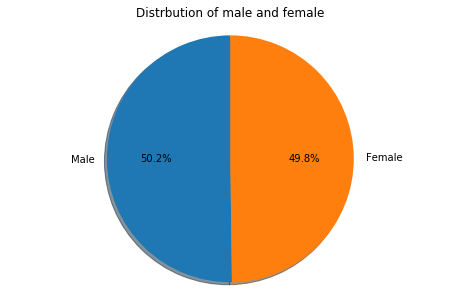

In [242]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label = sex_of_mice.keys()
fig = plt.figure(figsize=(8,5))
plt.pie(sex_of_mice,autopct='%1.1f%%',shadow=True,startangle=90,labels=label)
plt.title("Distrbution of male and female")
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [253]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


filtered_by_drug= clean_df[(clean_df["Drug Regimen"] == 'Capomulin') | (clean_df["Drug Regimen"] == 'Ramicane') |
(clean_df["Drug Regimen"] == 'Infubinol') | (clean_df["Drug Regimen"] == 'Ceftamin')]


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_tumor= filtered_by_drug.groupby('Mouse ID').max()["Timepoint"]
max_timepoint_tumor

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_drug_and_max_timepoint= pd.merge(max_timepoint_tumor,filtered_by_drug,on=["Timepoint","Mouse ID"])

merge_drug_and_max_timepoint

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a275,Ceftamin,Female,20,28,62.999356,3
3,45,a411,Ramicane,Male,3,22,38.407618,1
4,45,a444,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,45,y769,Ceftamin,Female,6,27,68.594745,4
96,45,y793,Capomulin,Male,17,17,31.896238,2
97,45,y865,Ceftamin,Male,23,26,64.729837,3
98,45,z578,Ramicane,Male,11,16,30.638696,0


In [244]:
# Put treatments into a list for for loop (and later for plot labels)
tretment_list =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#empty list to append lastest volume for each drug
latest_volume_each_drugs=[]

for drug in tretment_list:
    volume_of_tumor=merge_drug_and_max_timepoint[(merge_drug_and_max_timepoint["Drug Regimen"] == drug) ]["Tumor Volume (mm3)"]
    latest_volume_each_drugs.append(volume_of_tumor)

    #the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = volume_of_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    #Determine outliers using upper and lower bounds
    print(f"{drug}: Values below {lower_bound} could be outliers.")
    print(f"{drug}: Values above {upper_bound} could be outliers.\n")




Capomulin: Values below 20.70456164999999 could be outliers.
Capomulin: Values above 51.83201549 could be outliers.

Ramicane: Values below 17.912664470000003 could be outliers.
Ramicane: Values above 54.30681135 could be outliers.

Infubinol: Values below 36.83290494999999 could be outliers.
Infubinol: Values above 82.74144559000001 could be outliers.

Ceftamin: Values below 25.355449580000002 could be outliers.
Ceftamin: Values above 87.66645829999999 could be outliers.



<Figure size 1440x720 with 0 Axes>

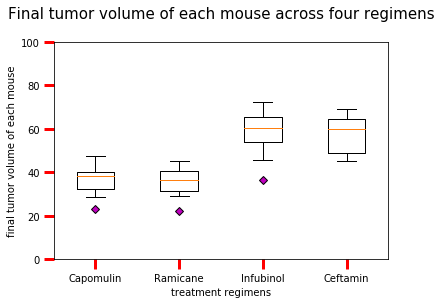

In [245]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mov_diamond = dict(markerfacecolor='m', marker='D')
fig = plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
ax.set_title('Multiple Samples with Different sizes')
ax.boxplot(latest_volume_each_drugs,labels=tretment_list,flierprops=mov_diamond, whis=1)
plt.ylim(0, 100)
plt.tick_params(labelsize=10, width=3, length=10,color="r")
plt.title("Final tumor volume of each mouse across four regimens\n",fontsize=15)
plt.ylabel("final tumor volume of each mouse")
plt.xlabel("treatment regimens")
plt.show()

## Line and Scatter Plots

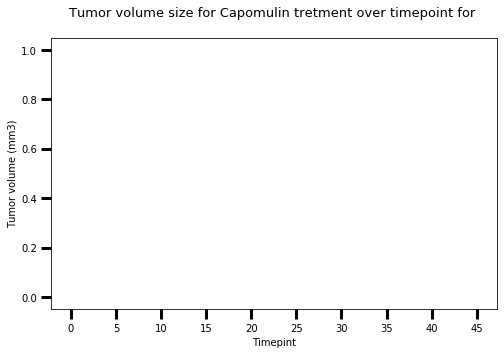

In [246]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_treated_with_Capomulin=clean_df[(clean_df["Drug Regimen"] == "Capomulin")]
mouse_id= input("what the mouse id you looking for ? (should be mouse treated by Capomulin")
one_mouse_df = mouse_treated_with_Capomulin[mouse_treated_with_Capomulin["Mouse ID"] == mouse_id]
plt.figure(figsize=(8,5))
plt.tick_params(labelsize=10, width=3, length=10)
plt.xlabel("Timepint")
plt.ylabel("Tumor volume (mm3)")
plt.xticks(np.arange(0,50,5))
plt.title(f"Tumor volume size for Capomulin tretment over timepoint for {mouse_id}\n",fontsize=13)
plt.plot(one_mouse_df["Timepoint"],one_mouse_df["Tumor Volume (mm3)"],color="r")
plt.show()  


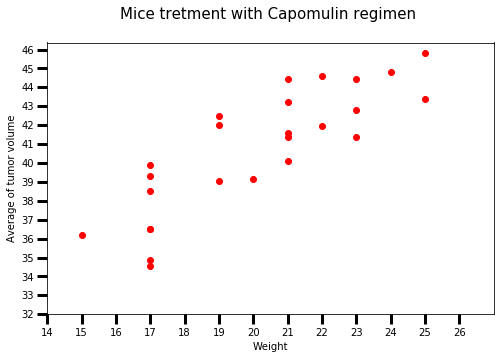

In [248]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouseid_tumor = mouse_treated_with_Capomulin.groupby(["Mouse ID"]).mean()
plt.figure(figsize=(8,5))

plt.scatter(mouseid_tumor["Weight (g)"],mouseid_tumor["Tumor Volume (mm3)"],marker="o", facecolors="red")

plt.xlabel("Weight",fontsize=10)
plt.ylabel("Average of tumor volume",fontsize=10)
plt.title("Mice tretment with Capomulin regimen \n",loc="center",fontsize=15)
plt.tick_params(labelsize=10, width=3, length=10)
plt.xlim(right=max(mouseid_tumor["Weight (g)"]+2))
plt.ylim(bottom=33)
plt.yticks(np.arange(32,47,1))
plt.xticks(np.arange(14,27,1))
# mouseid_tumor
plt.show()


## Correlation and Regression

The correlation between both factors is 0.84


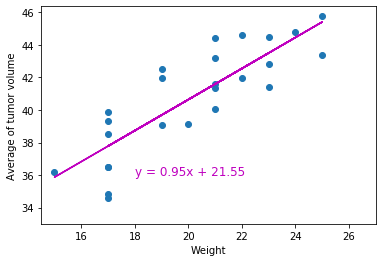

In [249]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mice_weight = mouseid_tumor["Weight (g)"]
avg_tumor_volume=mouseid_tumor["Tumor Volume (mm3)"]
correlation=st.pearsonr(mice_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(mice_weight, avg_tumor_volume)
regress_values = mice_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mice_weight,avg_tumor_volume)

plt.plot(mice_weight,regress_values,"m-")
plt.annotate(line_eq,(18,36),fontsize=12,color="m")
plt.xlabel("Weight",fontsize=10)
plt.ylabel("Average of tumor volume",fontsize=10)
plt.xlim(right=max(mouseid_tumor["Weight (g)"]+2))
plt.ylim(bottom=33)

plt.show()
